In [1]:
import numpy as np
from scipy.interpolate import interp1d
from scipy.integrate import quad
import matplotlib.pyplot as plt
from constants import *
from supernovaNuBoostedDM import *

/Users/yenhsun/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
# path
atmDir='../data/atmospheric/'
xscnDir='../data/xscn/'

# load file
atm_nue=np.loadtxt(atmDir + 'nu_e_SK.txt', skiprows=4)
atm_numu=np.loadtxt(atmDir + 'nu_mu_SK.txt', skiprows=4)
xscn_nu_e=np.loadtxt(xscnDir + 'nu_e_elastic.txt', skiprows=3)

In [3]:
# atm neutrino flux: 1/MeV 1/cm^2 1/s
atmNue = interp1d(atm_nue[:,0],atm_nue[:,1])
atmNueBar = interp1d(atm_nue[:,0],atm_nue[:,2])
atmNumu = interp1d(atm_numu[:,0],atm_numu[:,1])
atmNumuBar = interp1d(atm_numu[:,0],atm_numu[:,2])

In [4]:
# nu-e elastic scattering cross section: cm^2, input is log(MeV)
xscnNue = interp1d(xscn_nu_e[:,0]+3, 1e-38*xscn_nu_e[:,1]*10**xscn_nu_e[:,0])
xscnNueBar = interp1d(xscn_nu_e[:,0]+3, 1e-38*xscn_nu_e[:,4]*10**xscn_nu_e[:,0])
xscnNumu = interp1d(xscn_nu_e[:,0]+3, 1e-38*xscn_nu_e[:,2]*10**xscn_nu_e[:,0])
xscnNumuBar = interp1d(xscn_nu_e[:,0]+3, 1e-38*xscn_nu_e[:,5]*10**xscn_nu_e[:,0])

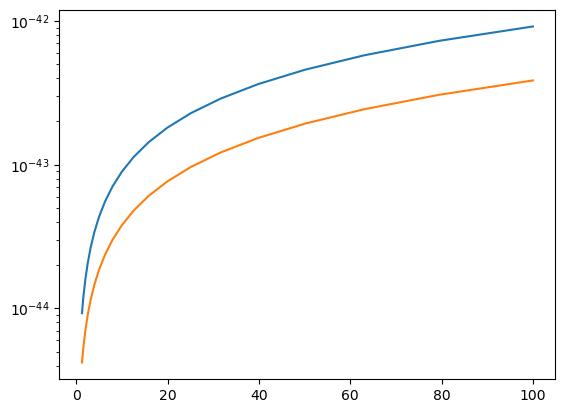

In [40]:
plt.plot(10**np.linspace(0.1,2,20),xscnNue(np.linspace(0.1,2,20)))
plt.plot(10**np.linspace(0.1,2,20),xscnNueBar(np.linspace(0.1,2,20)))
plt.yscale('log')

In [5]:
# SK total electron number
NeSK=7.473e33

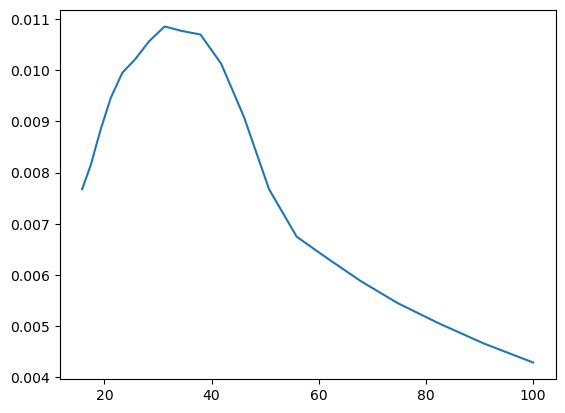

In [114]:
plt.plot(np.logspace(1.2,2,20),atmNue(np.logspace(1.2,2,20)))

In [113]:
atmNue(10**1.2)

array(0.00767648)

In [27]:
526*22.2*3000/yr2s

1.1108447488584474

In [30]:
get_tvan_thetaM(5,0.01,8.5)

(437330976.05645406, 0.06316142760840869)

In [10]:
mxList = np.loadtxt('../data/BDM_events_Tx_min_25MeV/event_eps0_Rstar8.5_beta0pi.txt')[:,0]

In [17]:
totalEvents = []
solar_bkg = 526/yr2s/7.37e33/22.2
for mx in mxList:
    tvan,thetaM = get_tvan_thetaM(5,mx,10)
    # truncation tvan
    if tvan <= 35*yr2s: pass
    else: tvan = 35*yr2s
    # angle resolution: 20 degree
    angRes = 20*np.pi/180
    if thetaM <= angRes:
        thetaM = angRes
    elif thetaM <= 2*angRes:
        thetaM = 2*angRes
    else:
        thetaM = 3*angRes
    # estimate bkg
    atmNueEvents = quad(lambda e: atmNue(e)*xscnNue(np.log10(e)),14,100)[0]
    atmNueBarEvents = quad(lambda e: atmNueBar(e)*xscnNueBar(np.log10(e)),14,100)[0]
    atmNumuEvents = quad(lambda e: atmNumu(e)*xscnNumu(np.log10(e)),14,100)[0]
    atmNumuBarEvents = quad(lambda e: atmNumuBar(e)*xscnNumuBar(np.log10(e)),14,100)[0]
    totEvents = (solar_bkg + atmNueEvents + atmNueBarEvents + atmNumuEvents + atmNumuBarEvents)*tvan
    totalEvents.append(totEvents)
totalEvents=np.asarray(totalEvents)

Text(0, 0.5, 'Total atmospheric $\\nu$ in SK')

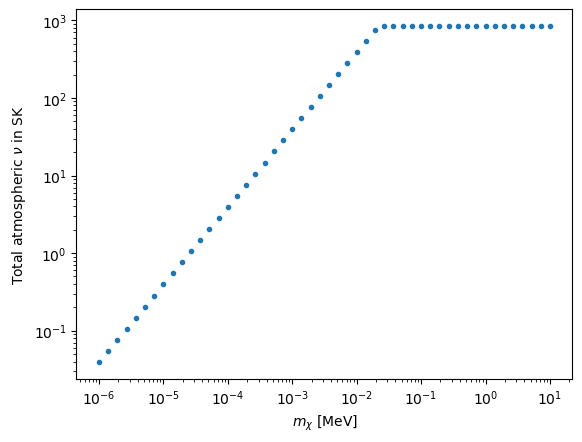

In [18]:
plt.plot(mxList,np.array(totalEvents)*NeSK,'.')
plt.xscale('log')
plt.yscale('log')
plt.xlabel(r'$m_\chi$ [MeV]')
plt.ylabel(r'Total atmospheric $\nu$ in SK')
#plt.savefig('../plots/atm_event_SK.pdf',bbox_inches='tight')

In [19]:
np.savetxt('../data/BDM_events_Tx_min_5MeV/atmevent_per_electron_Rstar10.txt',np.vstack((mxList,np.asarray(totalEvents))).T,fmt='%.5e     %.5e')

In [123]:
20*np.pi/180

0.3490658503988659

In [6]:
atmNueEvents = quad(lambda e: atmNue(e)*xscnNue(np.log10(e)),25,100)[0]
atmNueBarEvents = quad(lambda e: atmNueBar(e)*xscnNueBar(np.log10(e)),25,100)[0]
atmNumuEvents = quad(lambda e: atmNumu(e)*xscnNumu(np.log10(e)),25,100)[0]
atmNumuBarEvents = quad(lambda e: atmNumuBar(e)*xscnNumuBar(np.log10(e)),25,100)[0]
totEvents = (atmNueEvents + atmNueBarEvents + atmNumuEvents + atmNumuBarEvents)

In [12]:
totEvents*yr2s*NeSK/22.2

0.005868593924363194